<a href="https://colab.research.google.com/github/ItsmeJ0/CourseUdemyAI/blob/main/UdemyProject_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance --upgrade --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.30
    Uninstalling yfinance-0.2.30:
      Successfully uninstalled yfinance-0.2.30


In [ ]:
import yfinance as yf


In [ ]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
stocks = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

# Buat objek Ticker untuk masing-masing saham dan ambil data menggunakan yfinance
stock_data = {}
for stock in stocks:
    stock_data[stock] = yf.Ticker(stock).history(period="1y")
    #membuat stock data agar dapat dijadikan kedalam 1 data frame

# Gabungkan data saham menjadi satu DataFrame
bank_stocks = pd.concat(stock_data.values(), axis=1, keys=stock_data.keys())
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
print(bank_stocks.head())

Bank Ticker                      BAC                                   \
Stock Info                      Open       High        Low      Close   
Date                                                                    
2022-10-10 00:00:00-04:00  30.030545  30.176324  29.496022  29.797298   
2022-10-11 00:00:00-04:00  29.515460  29.612645  28.737969  28.932343   
2022-10-12 00:00:00-04:00  28.806001  29.457149  28.650503  29.019812   
2022-10-13 00:00:00-04:00  28.582472  30.876068  28.485285  30.798319   
2022-10-14 00:00:00-04:00  30.914940  31.711869  30.681694  30.808037   

Bank Ticker                                                         C  \
Stock Info                   Volume Dividends Stock Splits       Open   
Date                                                                    
2022-10-10 00:00:00-04:00  37669100       0.0          0.0  40.670760   
2022-10-11 00:00:00-04:00  58124000       0.0          0.0  39.502992   
2022-10-12 00:00:00-04:00  36137900       0.0     

## EDA

In [ ]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     37.329231
C       51.188396
GS     377.533295
JPM    156.842682
MS      99.048134
WFC     47.750084
dtype: float64

In [ ]:
returns = pd.DataFrame(bank_stocks)

In [ ]:
# kalkulasi return harian
for tick in stocks:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()


Bank Ticker                      BAC                                   \
Stock Info                      Open       High        Low      Close   
Date                                                                    
2022-10-10 00:00:00-04:00  30.030545  30.176324  29.496022  29.797298   
2022-10-11 00:00:00-04:00  29.515460  29.612645  28.737969  28.932343   
2022-10-12 00:00:00-04:00  28.806001  29.457149  28.650503  29.019812   
2022-10-13 00:00:00-04:00  28.582472  30.876068  28.485285  30.798319   
2022-10-14 00:00:00-04:00  30.914940  31.711869  30.681694  30.808037   

Bank Ticker                                                         C  \
Stock Info                   Volume Dividends Stock Splits       Open   
Date                                                                    
2022-10-10 00:00:00-04:00  37669100       0.0          0.0  40.670760   
2022-10-11 00:00:00-04:00  58124000       0.0          0.0  39.502992   
2022-10-12 00:00:00-04:00  36137900       0.0          0.0  38.660667   
2022-10-13 00:00:00-04:00  67671000       0.0          0.0  38.478801   
2022-10-14 00:00:00-04:00  58108500       0.0          0.0  41.245061   

Bank Ticker                                      ...        WFC            \
Stock Info                      High        Low  ...      Close    Volume   
Date                                             ...                        
2022-10-10 00:00:00-04:00  40.785621  39.751860  ...  40.290928  10973700   
2022-10-11 00:00:00-04:00  39.780577  38.689383  ...  39.105042  19135900   
2022-10-12 00:00:00-04:00  39.589136  38.335224  ...  39.377209  16469900   
2022-10-13 00:00:00-04:00  41.331209  38.296934  ...  41.194920  23808700   
2022-10-14 00:00:00-04:00  42.518114  40.967477  ...  41.962826  33954200   

Bank Ticker                                      BAC Return  C Return  \
Stock Info                Dividends Stock Splits                        
Date                                                                    
2022-10-10 00:00:00-04:00       0.0          0.0        NaN       NaN   
2022-10-11 00:00:00-04:00       0.0          0.0  -0.029028 -0.027644   
2022-10-12 00:00:00-04:00       0.0          0.0   0.003023  0.009641   
2022-10-13 00:00:00-04:00       0.0          0.0   0.061286  0.051665   
2022-10-14 00:00:00-04:00       0.0          0.0   0.000316  0.006519   

Bank Ticker               GS Return JPM Return MS Return WFC Return  
Stock Info                                                           
Date                                                                 
2022-10-10 00:00:00-04:00       NaN        NaN       NaN        NaN  
2022-10-11 00:00:00-04:00 -0.021062  -0.028860 -0.017982  -0.029433  
2022-10-12 00:00:00-04:00  0.003739   0.016183 -0.005195   0.006960  
2022-10-13 00:00:00-04:00  0.039822   0.055593  0.035509   0.046161  
2022-10-14 00:00:00-04:00 -0.023057   0.016641 -0.050681   0.018641  

[5 rows x 48 columns]

In [ ]:
# cari bank return tertinggi
returns.idxmax()

Bank Ticker  Stock Info  
BAC          Open           2022-11-11 00:00:00-05:00
             High           2022-11-11 00:00:00-05:00
             Low            2022-11-11 00:00:00-05:00
             Close          2022-11-11 00:00:00-05:00
             Volume         2023-03-13 00:00:00-04:00
             Dividends      2023-08-31 00:00:00-04:00
             Stock Splits   2022-10-10 00:00:00-04:00
C            Open           2023-03-06 00:00:00-05:00
             High           2023-02-02 00:00:00-05:00
             Low            2023-03-06 00:00:00-05:00
             Close          2023-03-03 00:00:00-05:00
             Volume         2023-03-13 00:00:00-04:00
             Dividends      2023-08-04 00:00:00-04:00
             Stock Splits   2022-10-10 00:00:00-04:00
GS           Open           2022-12-01 00:00:00-05:00
             High           2022-11-15 00:00:00-05:00
             Low            2022-11-25 00:00:00-05:00
             Close          2022-11-25 00:00:00-05:00
  

In [ ]:
# cari bank return terendah
returns.idxmin()

Bank Ticker  Stock Info  
BAC          Open           2023-10-09 00:00:00-04:00
             High           2023-10-04 00:00:00-04:00
             Low            2023-10-06 00:00:00-04:00
             Close          2023-10-09 00:00:00-04:00
             Volume         2023-10-09 00:00:00-04:00
             Dividends      2022-10-10 00:00:00-04:00
             Stock Splits   2022-10-10 00:00:00-04:00
C            Open           2022-10-13 00:00:00-04:00
             High           2022-10-12 00:00:00-04:00
             Low            2022-10-13 00:00:00-04:00
             Close          2022-10-11 00:00:00-04:00
             Volume         2023-10-09 00:00:00-04:00
             Dividends      2022-10-10 00:00:00-04:00
             Stock Splits   2022-10-10 00:00:00-04:00
GS           Open           2022-10-13 00:00:00-04:00
             High           2022-10-12 00:00:00-04:00
             Low            2022-10-13 00:00:00-04:00
             Close          2022-10-11 00:00:00-04:00
  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf

cf.go_offline()

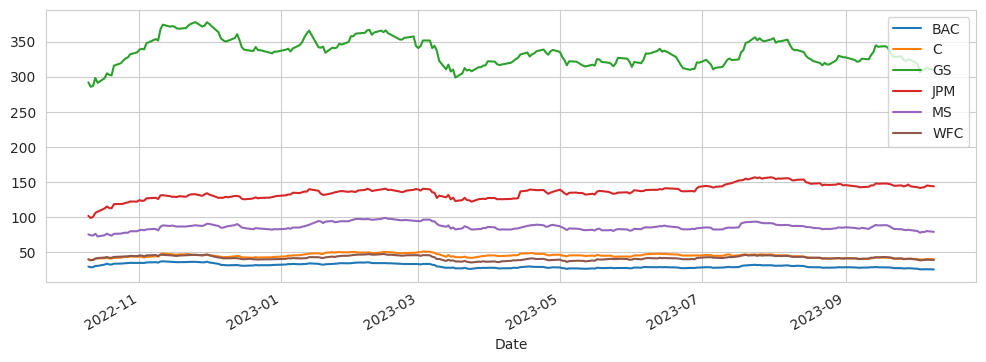

In [ ]:
for tick in stocks:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00


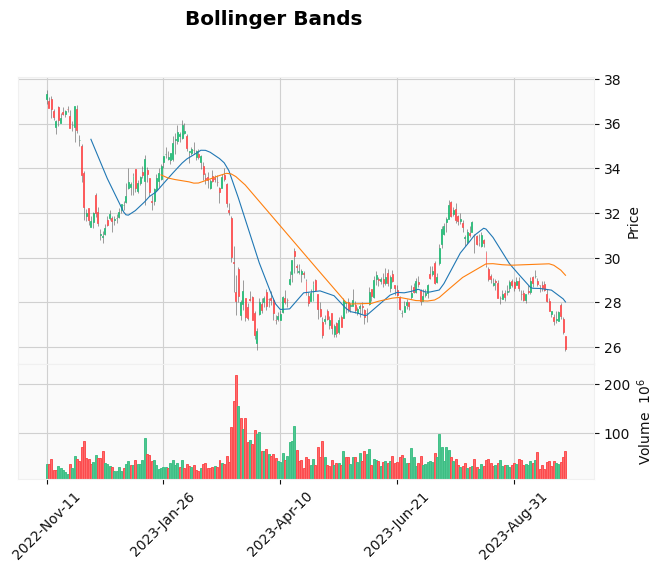

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import plotly
import mplfinance as mpf

BAC = yf.Ticker("BAC").history(period="1y")
BAC = BAC.loc['2022-11-11':'2023-10-03']
mpf.plot(BAC, type='candle', style='yahoo', title="Bollinger Bands", mav=(20, 50), volume=True)